In [18]:
# !pip install kaggle

In [19]:
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [20]:
# !kaggle competitions download -c playground-series-s4e12

In [21]:
# !unzip playground-series-s4e12.zip

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df_train = pd.read_csv("/Users/karnavivek/Library/CloudStorage/OneDrive-Personal/Kaggle_insurance_dataset/train.csv")
df_test = pd.read_csv("/Users/karnavivek/Library/CloudStorage/OneDrive-Personal/Kaggle_insurance_dataset/test.csv")
df_train.shape, df_test.shape

((1200000, 21), (800000, 20))

# EDA

In [24]:
df_train.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Age,19.0,39.0,23.0,21.0,21.0,29.0,41.0,48.0,21.0,44.0,56.0,23.0,25.0,44.0,40.0,18.0,59.0,34.0,18.0,40.0
Gender,Female,Female,Male,Male,Male,Male,Male,Female,Male,Male,Female,Male,Female,Female,Female,Male,Female,Female,Male,Female
Annual Income,10049.0,31678.0,25602.0,141855.0,39651.0,45963.0,40336.0,127237.0,1733.0,52447.0,8054.0,30983.0,23706.0,70893.0,23897.0,6076.0,28266.0,45907.0,29071.0,123751.0
Marital Status,Married,Divorced,Divorced,Married,Single,Married,Married,Divorced,Divorced,Married,Married,Single,Single,Single,Divorced,Married,Divorced,Divorced,Married,Single
Number of Dependents,1.0,3.0,3.0,2.0,1.0,1.0,0.0,2.0,3.0,2.0,1.0,3.0,4.0,0.0,NaN,2.0,2.0,4.0,NaN,2.0
Education Level,Bachelor's,Master's,High School,Bachelor's,Bachelor's,Bachelor's,PhD,High School,Bachelor's,Master's,Bachelor's,Master's,Master's,Bachelor's,High School,High School,PhD,High School,Bachelor's,Master's
Occupation,Self-Employed,NaN,Self-Employed,NaN,Self-Employed,NaN,NaN,Employed,NaN,Employed,Unemployed,NaN,Employed,NaN,Self-Employed,Employed,Unemployed,Self-Employed,Employed,Self-Employed
Health Score,22.598761,15.569731,47.177549,10.938144,20.376094,33.053198,NaN,5.769783,17.869551,20.473718,NaN,5.813129,4.090538,55.896322,29.082036,7.442964,21.673461,24.059639,20.838977,24.955316
Location,Urban,Rural,Suburban,Rural,Rural,Urban,Rural,Suburban,Urban,Urban,Rural,Urban,Urban,Suburban,Suburban,Urban,Urban,Suburban,Rural,Suburban


In [25]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1200000.0,599999.500000,346410.305851,0.000000,299999.750000,599999.500000,899999.250000,1.199999e+06
Age,1181295.0,41.145563,13.539950,18.000000,30.000000,41.000000,53.000000,6.400000e+01
Annual Income,1155051.0,32745.217777,32179.506124,1.000000,8001.000000,23911.000000,44634.000000,1.499970e+05
Number of Dependents,1090328.0,2.009934,1.417338,0.000000,1.000000,2.000000,3.000000,4.000000e+00
Health Score,1125924.0,25.613908,12.203462,2.012237,15.918959,24.578648,34.527209,5.897591e+01
Previous Claims,835971.0,1.002689,0.982840,0.000000,0.000000,1.000000,2.000000,9.000000e+00
Vehicle Age,1199994.0,9.569889,5.776189,0.000000,5.000000,10.000000,15.000000,1.900000e+01
Credit Score,1062118.0,592.924350,149.981945,300.000000,468.000000,595.000000,721.000000,8.490000e+02
Insurance Duration,1199999.0,5.018219,2.594331,1.000000,3.000000,5.000000,7.000000,9.000000e+00
Premium Amount,1200000.0,1102.544822,864.998859,20.000000,514.000000,872.000000,1509.000000,4.999000e+03


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [27]:
nulls = []

for i in df_train.columns:
  null = df_train[i].isnull().sum()
  nulls.append(null)

column_name = df_train.columns

null_dict = dict(zip(column_name, nulls))
null_dict

{'id': np.int64(0),
 'Age': np.int64(18705),
 'Gender': np.int64(0),
 'Annual Income': np.int64(44949),
 'Marital Status': np.int64(18529),
 'Number of Dependents': np.int64(109672),
 'Education Level': np.int64(0),
 'Occupation': np.int64(358075),
 'Health Score': np.int64(74076),
 'Location': np.int64(0),
 'Policy Type': np.int64(0),
 'Previous Claims': np.int64(364029),
 'Vehicle Age': np.int64(6),
 'Credit Score': np.int64(137882),
 'Insurance Duration': np.int64(1),
 'Policy Start Date': np.int64(0),
 'Customer Feedback': np.int64(77824),
 'Smoking Status': np.int64(0),
 'Exercise Frequency': np.int64(0),
 'Property Type': np.int64(0),
 'Premium Amount': np.int64(0)}

Now, we know in Detail that we need to do a lot of imputation in order to clean this dataset.

Once we do this, we will move on to train this with the following algorithms:
- Linear Regression to find Premium Amount
- XGboost
- Decision Trees for Regression
- Artificial Neural Network (ANN)
- Anything Superior in Deep learning Area

## Exploratory Data Analysis


In [28]:
df_train["Age"].describe()

count    1.181295e+06
mean     4.114556e+01
std      1.353995e+01
min      1.800000e+01
25%      3.000000e+01
50%      4.100000e+01
75%      5.300000e+01
max      6.400000e+01
Name: Age, dtype: float64

In [29]:
#df_train["Age"].info()
df_train["Age"].isnull().sum()

np.int64(18705)

In [30]:
percent_null = []

for i in df_train.columns:
   per_null = round((df_train[i].isnull().sum()/1200000)*100,2)
   percent_null.append(per_null)

percent_null

percent_null_dict = dict(zip(column_name, percent_null))
#percent_null_dict

sorted_per_null_dict = dict(sorted(percent_null_dict.items(), key=lambda item: item[1]))
sorted_per_null_dict

{'id': np.float64(0.0),
 'Gender': np.float64(0.0),
 'Education Level': np.float64(0.0),
 'Location': np.float64(0.0),
 'Policy Type': np.float64(0.0),
 'Vehicle Age': np.float64(0.0),
 'Insurance Duration': np.float64(0.0),
 'Policy Start Date': np.float64(0.0),
 'Smoking Status': np.float64(0.0),
 'Exercise Frequency': np.float64(0.0),
 'Property Type': np.float64(0.0),
 'Premium Amount': np.float64(0.0),
 'Marital Status': np.float64(1.54),
 'Age': np.float64(1.56),
 'Annual Income': np.float64(3.75),
 'Health Score': np.float64(6.17),
 'Customer Feedback': np.float64(6.49),
 'Number of Dependents': np.float64(9.14),
 'Credit Score': np.float64(11.49),
 'Occupation': np.float64(29.84),
 'Previous Claims': np.float64(30.34)}

We can see that out of 20 Features, we see a lot of missing values for following features:

- 'Health Score': 6.17%
- 'Customer Feedback': 6.49%
- 'Number of Dependents': 9.14%
- 'Credit Score': 11.49%
- 'Occupation': 29.84%
- 'Previous Claims': 30.34%

We must be careful by doing some special Imputation techniques because of their sheer amount of missing values!

We also have other Features with missing values but as their percentage is less, we are going for a simple imputation, these are listed below:

- 'Marital Status': 1.54%
- 'Age': 1.56%
- 'Annual Income': 3.75%

Let's Check Normal Graph of these features to understand which imputation would work like charm:
- Marital Status
- Age
- Annual Income

### Age

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age', ylabel='Density'>

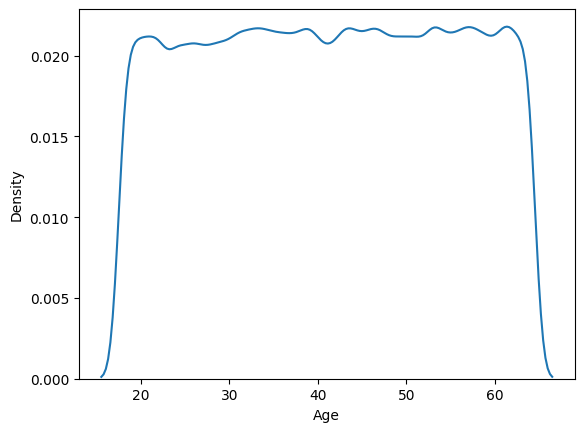

In [32]:
sns.kdeplot(df_train['Age'])

<Axes: ylabel='Age'>

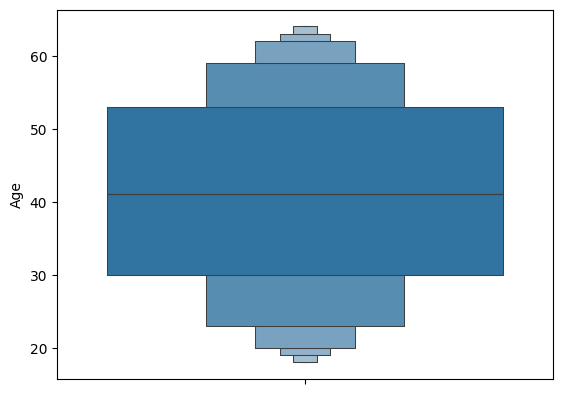

In [33]:
sns.boxenplot(df_train["Age"])

In [34]:
Q1 = df_train['Age'].quantile(0.25)
Q3 = df_train['Age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_train[(df_train['Age'] < lower_bound) | (df_train['Age'] > upper_bound)]

outliers

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount


We can see that "Age" plot seems Equally Distributed, hence we will use a simple "Mean Imputation"

In [35]:
df_train['Age'] = df_train["Age"].fillna(df_train['Age'].mean())

In [36]:
df_train["Age"].isna().sum()

np.int64(0)

<Axes: xlabel='Age', ylabel='Density'>

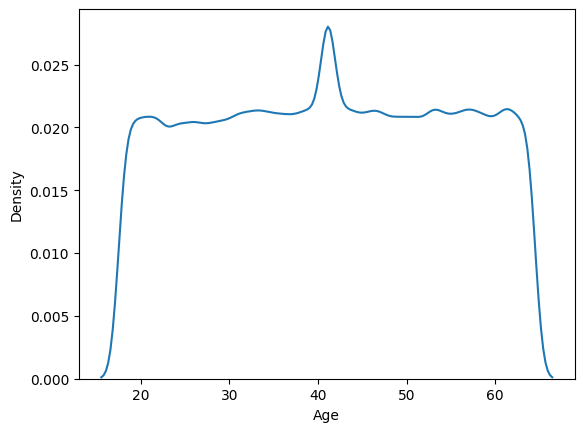

In [37]:
sns.kdeplot(df_train['Age'])

### Annual Income

<Axes: xlabel='Annual Income', ylabel='Density'>

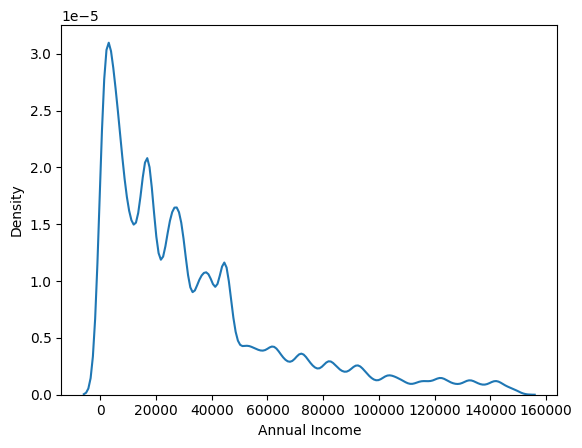

In [38]:
sns.kdeplot(df_train['Annual Income'])


<Axes: ylabel='Annual Income'>

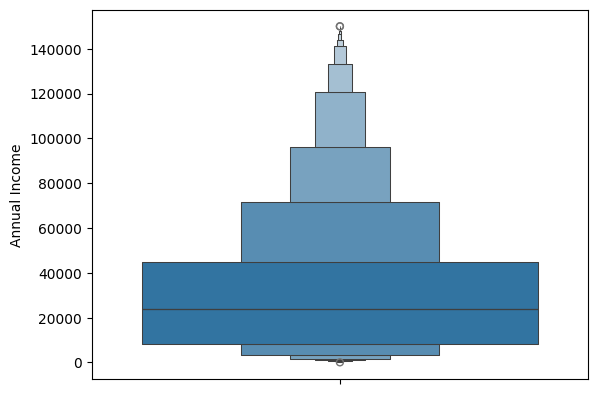

In [39]:
sns.boxenplot(df_train["Annual Income"])

In [40]:
Q1 = df_train["Annual Income"].quantile(0.25)
Q3 = df_train["Annual Income"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_train[(df_train["Annual Income"] < lower_bound) | (df_train["Annual Income"] > upper_bound)]

outliers

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,...,1.0,11.0,398.0,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.0
19,19,40.0,Female,123751.0,Single,2.0,Master's,Self-Employed,24.955316,Suburban,...,0.0,8.0,420.0,2.0,2020-06-25 15:21:39.152732,Good,Yes,Rarely,Condo,40.0
29,29,64.0,Male,131038.0,Single,NaN,PhD,Self-Employed,20.717076,Rural,...,NaN,14.0,495.0,1.0,2020-08-24 15:21:39.155231,Good,Yes,Monthly,House,2360.0
59,59,62.0,Female,147020.0,Married,4.0,Bachelor's,Self-Employed,24.121746,Urban,...,NaN,0.0,498.0,6.0,2021-05-10 15:21:39.155231,NaN,No,Daily,Condo,1624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199891,1199891,18.0,Female,120884.0,Divorced,2.0,Master's,Employed,3.393601,Suburban,...,0.0,19.0,834.0,4.0,2021-12-12 15:21:39.186212,Poor,Yes,Monthly,Condo,196.0
1199942,1199942,45.0,Male,107739.0,Divorced,0.0,High School,Employed,31.708402,Rural,...,NaN,12.0,308.0,1.0,2023-03-23 15:21:39.121169,Good,No,Rarely,Apartment,1233.0
1199952,1199952,34.0,Female,134908.0,Divorced,2.0,High School,Unemployed,41.398524,Suburban,...,NaN,13.0,356.0,1.0,2020-08-04 15:21:39.265513,Poor,No,Rarely,Condo,821.0
1199956,1199956,58.0,Male,99860.0,Married,NaN,High School,Self-Employed,14.082348,Urban,...,2.0,18.0,307.0,3.0,2022-05-08 15:21:39.134960,Poor,Yes,Rarely,Condo,2694.0


In [41]:
df_train['Annual Income'].median(), df_train['Annual Income'].mean()

(np.float64(23911.0), np.float64(32745.21777653108))

"Annual Income" has a lot of OUTLIERS! We have to use "Median Imputation" method so as to be robust to Outliers we see here.

In [42]:
df_train["Annual Income"] = df_train["Annual Income"].fillna(df_train["Annual Income"].median())
df_train["Annual Income"]

0           10049.0
1           31678.0
2           25602.0
3          141855.0
4           39651.0
             ...   
1199995     27316.0
1199996     35786.0
1199997     51884.0
1199998     23911.0
1199999     23911.0
Name: Annual Income, Length: 1200000, dtype: float64

In [43]:
df_train["Annual Income"].isna().sum()

np.int64(0)

<Axes: xlabel='Annual Income', ylabel='Density'>

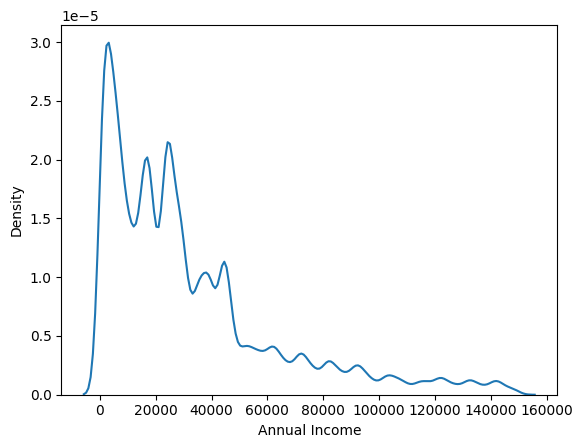

In [44]:
sns.kdeplot(df_train['Annual Income'])

### Marital Status

In [45]:
df_train['Marital Status'].unique()

array(['Married', 'Divorced', 'Single', nan], dtype=object)

In [46]:
df_train['Marital Status'].value_counts()

Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Marital Status'>

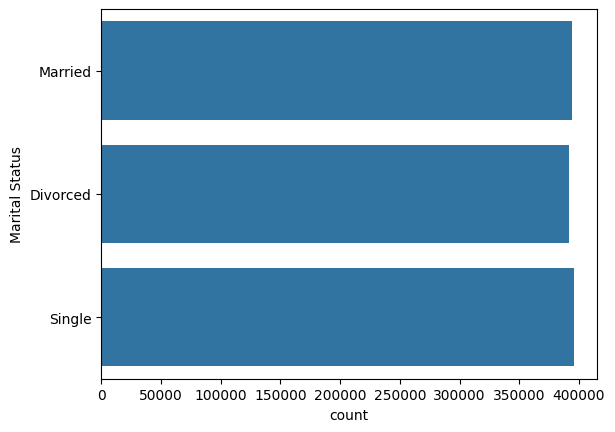

In [47]:
sns.countplot(df_train['Marital Status'])

We can see that no one Category dominates, hence for imputation we can either go with KNN (or) Frequency based Imputation.

In [48]:
df_train['Marital Status'].isna().sum()

np.int64(18529)

In [49]:
#Frequency Based Imputation

import numpy as np

def impute_with_random_choice(series):
    probs = series.value_counts(normalize=True)
    return np.random.choice(probs.index, size=series.isnull().sum(), p=probs.values)

missing_indices = df_train['Marital Status'].isnull()
df_train.loc[missing_indices, 'Marital Status'] = impute_with_random_choice(df_train['Marital Status'])


In [50]:
df_train['Marital Status'].isna().sum()

np.int64(0)

In [51]:
df_train['Marital Status'].value_counts()

Marital Status
Single      401605
Married     400482
Divorced    397913
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Marital Status'>

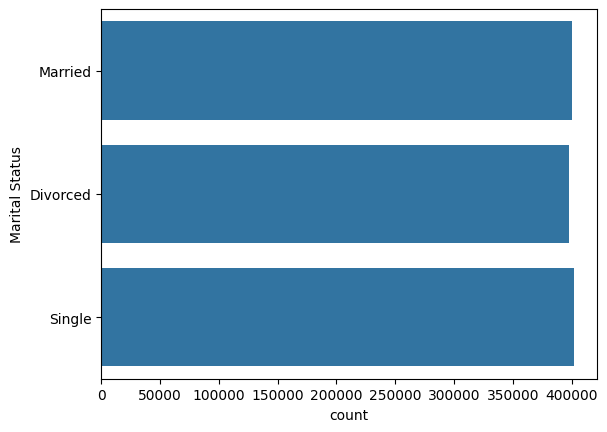

In [52]:
sns.countplot(df_train['Marital Status'])

We have successfully Imputed of the 3 features, Now we move on to Impute Features with LARGE number of missing values!


- 'Health Score': 6.17%
- 'Customer Feedback': 6.49%
- 'Number of Dependents': 9.14%
- 'Credit Score': 11.49%
- 'Occupation': 29.84%
- 'Previous Claims': 30.34%

In [53]:
df_train.isna().sum()

id                           0
Age                          0
Gender                       0
Annual Income                0
Marital Status               0
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

### Health Score

In [54]:
df_train["Health Score"].describe()

count    1.125924e+06
mean     2.561391e+01
std      1.220346e+01
min      2.012237e+00
25%      1.591896e+01
50%      2.457865e+01
75%      3.452721e+01
max      5.897591e+01
Name: Health Score, dtype: float64

<Axes: ylabel='Health Score'>

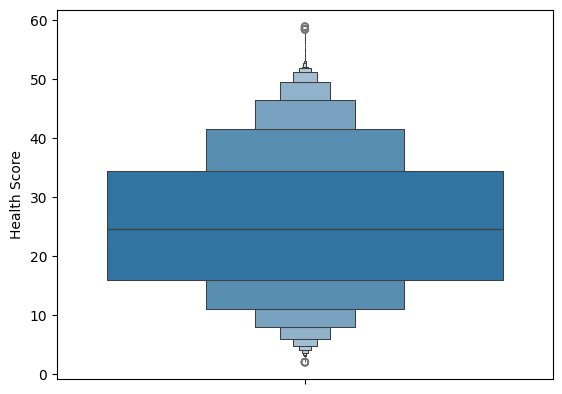

In [55]:
sns.boxenplot(df_train['Health Score'])

In [56]:
Q1_HS = df_train['Health Score'].quantile(0.25)
Q3_HS = df_train['Health Score'].quantile(0.75)

IQR_HS = Q3_HS - Q1_HS

# Calculate the lower and upper bounds for outliers
lower_bound = Q1_HS - 1.5 * IQR_HS
upper_bound = Q3_HS + 1.5 * IQR_HS

# Identify outliers
outliers_HS = df_train[(df_train['Health Score'] < lower_bound) | (df_train['Health Score'] > upper_bound)]

outliers_HS

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount


No outliers, we can move ahead with Imputation

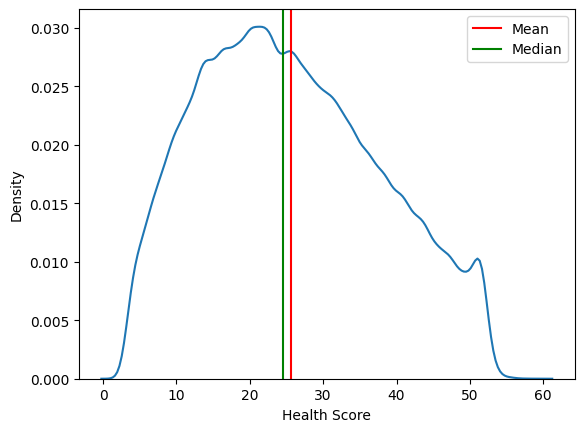

In [57]:
sns.kdeplot(df_train, x = df_train['Health Score'])
plt.axvline(x=df_train['Health Score'].mean(), c='r', label="Mean")
plt.axvline(x=df_train['Health Score'].median(), c='g', label = "Median")
plt.legend()
plt.show()

In Case of Median Imputation, we see this change in kde plot, which is not good in terms of imputation, hence lets try something else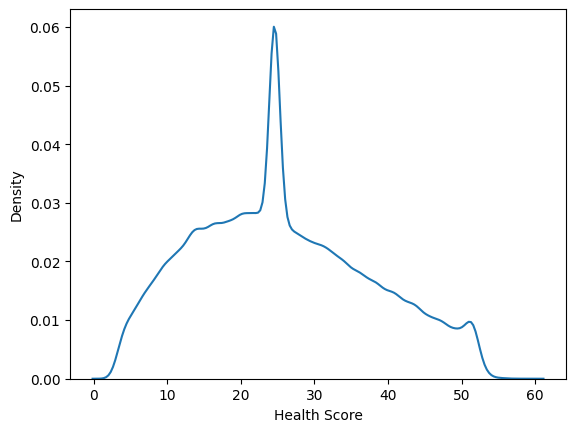)

In [58]:
#Median Imputation  - Does not give good results
# df_train["Health Score"] = df_train["Health Score"].fillna(df_train["Health Score"].median())
# df_train["Health Score"].isna().sum()

#Frequcny based Imputution
missing_values = df_train["Health Score"].isna()

df_train.loc[missing_values, "Health Score"] = np.random.choice(df_train["Health Score"].dropna(), size = missing_values.sum())

In [59]:
df_train["Health Score"].isna().sum()

np.int64(0)

In [60]:
df_train["Health Score"].value_counts()

Health Score
19.927241    138
25.907650    131
19.869701    126
22.955402    112
27.845006    109
            ... 
14.090087      1
16.493429      1
25.249821      1
29.927251      1
13.661678      1
Name: count, Length: 532655, dtype: int64

<Axes: xlabel='Health Score', ylabel='Density'>

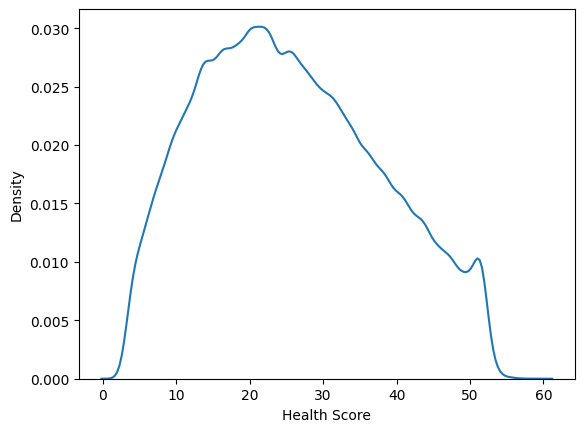

In [61]:
sns.kdeplot(df_train, x = df_train['Health Score'])

In [62]:
df_train["Health Score"].describe()

count    1.200000e+06
mean     2.561631e+01
std      1.220334e+01
min      2.012237e+00
25%      1.592289e+01
50%      2.458195e+01
75%      3.453401e+01
max      5.897591e+01
Name: Health Score, dtype: float64

In [63]:
df_train.isna().sum()

id                           0
Age                          0
Gender                       0
Annual Income                0
Marital Status               0
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score                 0
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

### Customer Feedback

In [64]:
df_train['Customer Feedback'].value_counts()

Customer Feedback
Average    377905
Poor       375518
Good       368753
Name: count, dtype: int64

In [65]:
df_train['Customer Feedback'].isna().sum()

np.int64(77824)

In [66]:
#Frequency Based Imputation
def impute_with_random_choice(series):
    probs = series.value_counts(normalize=True)
    return np.random.choice(probs.index, size=series.isnull().sum(), p=probs.values)

missing_indices = df_train['Customer Feedback'].isnull()
df_train.loc[missing_indices, 'Customer Feedback'] = impute_with_random_choice(df_train['Customer Feedback'])


In [67]:
df_train['Customer Feedback'].value_counts()

Customer Feedback
Average    404084
Poor       401473
Good       394443
Name: count, dtype: int64

### Number of Dependencies

In [68]:
df_train['Number of Dependents'].value_counts()

Number of Dependents
3.0    221475
4.0    220340
0.0    218124
2.0    215313
1.0    215076
Name: count, dtype: int64

In [69]:
#Frequency Based Imputation
def impute_with_random_choice(series):
    probs = series.value_counts(normalize=True)
    return np.random.choice(probs.index, size=series.isnull().sum(), p=probs.values)

missing_indices = df_train['Number of Dependents'].isnull()
df_train.loc[missing_indices, 'Number of Dependents'] = impute_with_random_choice(df_train['Number of Dependents'])


In [70]:
df_train['Number of Dependents'].isna().sum()

np.int64(0)

In [71]:
df_train['Number of Dependents'].value_counts()

Number of Dependents
3.0    243824
4.0    242562
0.0    239964
2.0    236984
1.0    236666
Name: count, dtype: int64

### Credit Score

In [72]:
df_train['Credit Score'].isna().sum()

np.int64(137882)

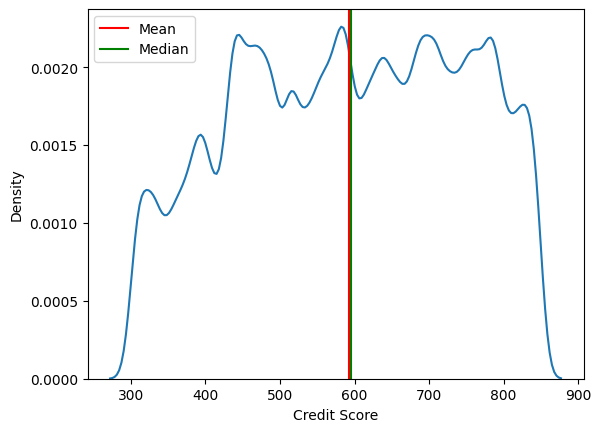

In [73]:
sns.kdeplot(df_train['Credit Score'])
plt.axvline(x=df_train['Credit Score'].mean(),c='r', label = 'Mean')
plt.axvline(x=df_train['Credit Score'].median(),c='g', label = "Median")
plt.legend()
plt.show()

In [74]:
missing_values = df_train['Credit Score'].isna()

df_train.loc[missing_values, 'Credit Score'] = np.random.choice(df_train['Credit Score'].dropna(), size = missing_values.sum())

In [75]:
df_train['Credit Score'].isna().sum()

np.int64(0)

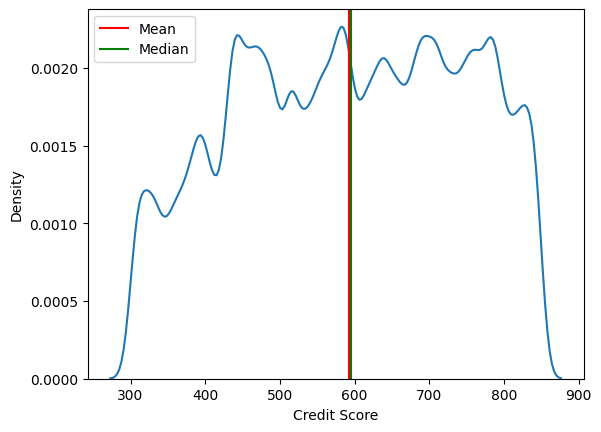

In [76]:
sns.kdeplot(df_train['Credit Score'])
plt.axvline(x=df_train['Credit Score'].mean(),c='r', label = 'Mean')
plt.axvline(x=df_train['Credit Score'].median(),c='g', label = "Median")
plt.legend()
plt.show()

In [77]:
df_train['Credit Score'].describe()

count    1.200000e+06
mean     5.929800e+02
std      1.499521e+02
min      3.000000e+02
25%      4.680000e+02
50%      5.950000e+02
75%      7.210000e+02
max      8.490000e+02
Name: Credit Score, dtype: float64

### Occupation

In [78]:
df_train['Occupation']

0          Self-Employed
1                    NaN
2          Self-Employed
3                    NaN
4          Self-Employed
               ...      
1199995       Unemployed
1199996    Self-Employed
1199997              NaN
1199998              NaN
1199999              NaN
Name: Occupation, Length: 1200000, dtype: object

In [79]:
df_train['Occupation'].value_counts()

Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64

In [80]:
#Frequency Based Imputation
def impute_with_random_choice(series):
    probs = series.value_counts(normalize=True)
    return np.random.choice(probs.index, size=series.isnull().sum(), p=probs.values)

missing_indices = df_train['Occupation'].isnull()
df_train.loc[missing_indices, 'Occupation'] = impute_with_random_choice(df_train['Occupation'])


In [81]:
df_train['Occupation'].value_counts()

Occupation
Employed         402946
Self-Employed    402445
Unemployed       394609
Name: count, dtype: int64

In [82]:
df_train['Occupation'].isna().sum()

np.int64(0)

### Previous Claims

In [83]:
df_train['Previous Claims'].value_counts()

Previous Claims
0.0    305433
1.0    300811
2.0    167661
3.0     49011
4.0     10668
5.0      2018
6.0       302
7.0        58
8.0         8
9.0         1
Name: count, dtype: int64

In [84]:
df_train['Previous Claims'].isna().sum()

np.int64(364029)

In [85]:
#Frequency Based Imputation
def impute_with_random_choice(series):
    probs = series.value_counts(normalize=True)
    return np.random.choice(probs.index, size=series.isnull().sum(), p=probs.values)

missing_indices = df_train['Previous Claims'].isnull()
df_train.loc[missing_indices, 'Previous Claims'] = impute_with_random_choice(df_train['Previous Claims'])


In [86]:
df_train['Previous Claims'].value_counts() #we improved it through same proportions

Previous Claims
0.0    438210
1.0    431763
2.0    240739
3.0     70457
4.0     15345
5.0      2951
6.0       443
7.0        76
8.0        15
9.0         1
Name: count, dtype: int64

In [87]:
df_train['Previous Claims'].isna().sum()

np.int64(0)

In [88]:
df_train['Insurance Duration'] = df_train['Insurance Duration'].fillna(9)

In [89]:
df_train['Insurance Duration'].isna().sum()

np.int64(0)

### Vehicle Age

In [90]:
df_train['Vehicle Age'].value_counts()

Vehicle Age
17.0    62577
0.0     61615
11.0    61483
18.0    61399
10.0    61351
15.0    60817
14.0    60815
12.0    60718
19.0    60495
16.0    60314
9.0     59833
2.0     59741
7.0     59700
5.0     59499
3.0     59058
13.0    58684
8.0     58298
4.0     58148
6.0     58084
1.0     57365
Name: count, dtype: int64

In [91]:
df_train['Vehicle Age'] = df_train['Vehicle Age'].fillna(10)

In [92]:
df_train.isna().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

## Running our Clean Data through Model

In [93]:
#Clean data with no missing values
df_train.isna().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

In [94]:
import pandas as pd
df_train["Policy Start Date"] = pd.to_datetime(df_train["Policy Start Date"])

In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1200000 non-null  int64         
 1   Age                   1200000 non-null  float64       
 2   Gender                1200000 non-null  object        
 3   Annual Income         1200000 non-null  float64       
 4   Marital Status        1200000 non-null  object        
 5   Number of Dependents  1200000 non-null  float64       
 6   Education Level       1200000 non-null  object        
 7   Occupation            1200000 non-null  object        
 8   Health Score          1200000 non-null  float64       
 9   Location              1200000 non-null  object        
 10  Policy Type           1200000 non-null  object        
 11  Previous Claims       1200000 non-null  float64       
 12  Vehicle Age           1200000 non-null  fl

In [96]:
# y = df_train['Premium Amount']
# y

In [97]:
# X = df_train.drop(['Premium Amount'], axis=1)
# X

In [98]:
df_test.shape

(800000, 20)

## We need to Encode Categorical Data using OneHotEncoding method

In [99]:
df_train_cat = df_train.select_dtypes(include = 'object')
df_train_cat

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,Female,Married,Bachelor's,Self-Employed,Urban,Premium,Poor,No,Weekly,House
1,Female,Divorced,Master's,Employed,Rural,Comprehensive,Average,Yes,Monthly,House
2,Male,Divorced,High School,Self-Employed,Suburban,Premium,Good,Yes,Weekly,House
3,Male,Married,Bachelor's,Self-Employed,Rural,Basic,Poor,Yes,Daily,Apartment
4,Male,Single,Bachelor's,Self-Employed,Rural,Premium,Poor,Yes,Weekly,House
...,...,...,...,...,...,...,...,...,...,...
1199995,Female,Married,Master's,Unemployed,Urban,Premium,Poor,No,Daily,Apartment
1199996,Male,Divorced,Master's,Self-Employed,Rural,Comprehensive,Poor,No,Weekly,Apartment
1199997,Male,Divorced,Master's,Self-Employed,Suburban,Basic,Good,No,Monthly,Condo
1199998,Male,Single,PhD,Unemployed,Suburban,Premium,Poor,No,Daily,Apartment


Datetime datatype because it is not useful to our study, so to less complicate our stuff, we are going to removing it from our dataset.

In [100]:
df_train_num = df_train.select_dtypes(exclude=('object', 'datetime64[ns]'))
df_train_num

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
0,0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0,2869.0
1,1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.0,2.0,1483.0
2,2,23.0,25602.0,3.0,47.177549,1.0,14.0,847.0,3.0,567.0
3,3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.0,1.0,765.0
4,4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0,2022.0
...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,27316.0,0.0,13.772907,2.0,5.0,372.0,3.0,1303.0
1199996,1199996,54.0,35786.0,0.0,11.483482,0.0,10.0,597.0,4.0,821.0
1199997,1199997,19.0,51884.0,0.0,14.724469,0.0,19.0,701.0,6.0,371.0
1199998,1199998,55.0,23911.0,1.0,18.547381,1.0,7.0,407.0,4.0,596.0


In [101]:
df_train_num.drop(['id'],axis=1, inplace=True)

In [102]:
df_train_num

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0,2869.0
1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.0,2.0,1483.0
2,23.0,25602.0,3.0,47.177549,1.0,14.0,847.0,3.0,567.0
3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.0,1.0,765.0
4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0,2022.0
...,...,...,...,...,...,...,...,...,...
1199995,36.0,27316.0,0.0,13.772907,2.0,5.0,372.0,3.0,1303.0
1199996,54.0,35786.0,0.0,11.483482,0.0,10.0,597.0,4.0,821.0
1199997,19.0,51884.0,0.0,14.724469,0.0,19.0,701.0,6.0,371.0
1199998,55.0,23911.0,1.0,18.547381,1.0,7.0,407.0,4.0,596.0


In [103]:
y = df_train_num['Premium Amount']
y

0          2869.0
1          1483.0
2           567.0
3           765.0
4          2022.0
            ...  
1199995    1303.0
1199996     821.0
1199997     371.0
1199998     596.0
1199999    2480.0
Name: Premium Amount, Length: 1200000, dtype: float64

In [104]:
df_train_num.drop(['Premium Amount'],axis=1, inplace=True)

In [105]:
ohe_train = pd.get_dummies(df_train_cat, drop_first=True)
ohe_train

,Gender_Male,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master's,Education Level_PhD,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,False,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,False,True
1,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True
2,True,False,False,True,False,False,True,False,True,False,False,True,True,False,True,False,False,True,False,True
3,True,True,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False
4,True,False,True,False,False,False,True,False,False,False,False,True,False,True,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,False,True,False,False,True,False,False,True,False,True,False,True,False,True,False,False,False,False,False,False
1199996,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False
1199997,True,False,False,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False
1199998,True,False,True,False,False,True,False,True,True,False,False,True,False,True,False,False,False,False,False,False


In [106]:
ohe_train = ohe_train.astype(int)
ohe_train

,Gender_Male,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master's,Education Level_PhD,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1
3,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
4,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0
1199996,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
1199997,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
1199998,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0


In [107]:
df_train_final = pd.concat([df_train_num, ohe_train], axis = 1)
df_train_final

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Gender_Male,Marital Status_Married,...,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0,0,1,...,0,1,0,1,0,0,0,1,0,1
1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.0,2.0,0,0,...,1,0,0,0,1,1,0,0,0,1
2,23.0,25602.0,3.0,47.177549,1.0,14.0,847.0,3.0,1,0,...,0,1,1,0,1,0,0,1,0,1
3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.0,1.0,1,1,...,0,0,0,1,1,0,0,0,0,0
4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0,1,0,...,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,27316.0,0.0,13.772907,2.0,5.0,372.0,3.0,0,1,...,0,1,0,1,0,0,0,0,0,0
1199996,54.0,35786.0,0.0,11.483482,0.0,10.0,597.0,4.0,1,0,...,1,0,0,1,0,0,0,1,0,0
1199997,19.0,51884.0,0.0,14.724469,0.0,19.0,701.0,6.0,1,0,...,0,0,1,0,0,1,0,0,1,0
1199998,55.0,23911.0,1.0,18.547381,1.0,7.0,407.0,4.0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [108]:
X = df_train_final.copy()
X

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Gender_Male,Marital Status_Married,...,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0,0,1,...,0,1,0,1,0,0,0,1,0,1
1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.0,2.0,0,0,...,1,0,0,0,1,1,0,0,0,1
2,23.0,25602.0,3.0,47.177549,1.0,14.0,847.0,3.0,1,0,...,0,1,1,0,1,0,0,1,0,1
3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.0,1.0,1,1,...,0,0,0,1,1,0,0,0,0,0
4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0,1,0,...,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,27316.0,0.0,13.772907,2.0,5.0,372.0,3.0,0,1,...,0,1,0,1,0,0,0,0,0,0
1199996,54.0,35786.0,0.0,11.483482,0.0,10.0,597.0,4.0,1,0,...,1,0,0,1,0,0,0,1,0,0
1199997,19.0,51884.0,0.0,14.724469,0.0,19.0,701.0,6.0,1,0,...,0,0,1,0,0,1,0,0,1,0
1199998,55.0,23911.0,1.0,18.547381,1.0,7.0,407.0,4.0,1,0,...,0,1,0,1,0,0,0,0,0,0


## TEST

In [109]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 28 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Age                          1200000 non-null  float64
 1   Annual Income                1200000 non-null  float64
 2   Number of Dependents         1200000 non-null  float64
 3   Health Score                 1200000 non-null  float64
 4   Previous Claims              1200000 non-null  float64
 5   Vehicle Age                  1200000 non-null  float64
 6   Credit Score                 1200000 non-null  float64
 7   Insurance Duration           1200000 non-null  float64
 8   Gender_Male                  1200000 non-null  int64  
 9   Marital Status_Married       1200000 non-null  int64  
 10  Marital Status_Single        1200000 non-null  int64  
 11  Education Level_High School  1200000 non-null  int64  
 12  Education Level_Master's     1200000 non-n

In [110]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

age
annual income
marital status
number of dependents
occupation
health Score
Previous Claims
vehicle age
Credit score
Insurance Duration
Customer Feedback

In [111]:
df_test.head(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House
5,1200005,43.0,Male,52370.0,Married,2.0,Bachelor's,NaN,5.386224,Suburban,Basic,NaN,15.0,432.0,2.0,2022-07-08 15:21:39.223901,NaN,No,Rarely,Condo
6,1200006,21.0,Female,5896.0,Married,3.0,Master's,NaN,14.773963,Rural,Comprehensive,1.0,14.0,321.0,8.0,2023-11-12 15:21:39.288099,Good,No,Monthly,Condo
7,1200007,44.0,Male,31855.0,Divorced,3.0,Bachelor's,NaN,20.847900,Suburban,Premium,NaN,8.0,712.0,1.0,2021-03-12 15:21:39.149731,Poor,Yes,Monthly,Apartment
8,1200008,32.0,Female,76463.0,Divorced,4.0,PhD,NaN,22.988787,Suburban,Basic,0.0,1.0,540.0,2.0,2021-07-08 15:21:39.169102,Average,No,Weekly,Apartment
9,1200009,48.0,Female,27982.0,Married,2.0,High School,NaN,43.567433,Urban,Premium,1.0,15.0,757.0,7.0,2021-02-15 15:21:39.134960,Good,Yes,Daily,House


In [112]:
id_test = df_test['id']
id_test

0         1200000
1         1200001
2         1200002
3         1200003
4         1200004
           ...   
799995    1999995
799996    1999996
799997    1999997
799998    1999998
799999    1999999
Name: id, Length: 800000, dtype: int64

In [113]:
TEST = df_test.drop(['id','Policy Start Date'], axis=1)
TEST

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,Poor,Yes,Weekly,House
1,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,Good,Yes,Rarely,Apartment
2,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,Average,Yes,Monthly,Condo
3,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,Poor,Yes,Daily,House
4,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,Average,No,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,50.0,Female,38782.0,Married,1.0,Bachelor's,NaN,14.498639,Rural,Premium,NaN,8.0,309.0,2.0,Average,Yes,Daily,Condo
799996,NaN,Female,73462.0,Single,0.0,Master's,NaN,8.145748,Rural,Basic,2.0,0.0,NaN,2.0,Good,No,Daily,Apartment
799997,26.0,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,NaN,10.0,NaN,6.0,Poor,No,Monthly,Apartment
799998,34.0,Female,45661.0,Single,3.0,Master's,NaN,15.937248,Urban,Premium,2.0,17.0,467.0,7.0,Average,No,Weekly,Condo


In [114]:
#updating all the data in TEST set like we did for the training set

# age
TEST['Age'] = TEST["Age"].fillna(TEST['Age'].mean())

# annual income
TEST["Annual Income"] = TEST["Annual Income"].fillna(TEST["Annual Income"].median())

# marital status
def impute_with_random_choice(series):
    probs = series.value_counts(normalize=True)
    return np.random.choice(probs.index, size=series.isnull().sum(), p=probs.values)

missing_indices = TEST['Marital Status'].isnull()
TEST.loc[missing_indices, 'Marital Status'] = impute_with_random_choice(TEST['Marital Status'])

# number of dependents
def impute_with_random_choice(series):
    probs = series.value_counts(normalize=True)
    return np.random.choice(probs.index, size=series.isnull().sum(), p=probs.values)

missing_indices = TEST['Number of Dependents'].isnull()
TEST.loc[missing_indices, 'Number of Dependents'] = impute_with_random_choice(TEST['Number of Dependents'])

# occupation
def impute_with_random_choice(series):
    probs = series.value_counts(normalize=True)
    return np.random.choice(probs.index, size=series.isnull().sum(), p=probs.values)

missing_indices = TEST['Occupation'].isnull()
TEST.loc[missing_indices, 'Occupation'] = impute_with_random_choice(TEST['Occupation'])

# health score
missing_values = TEST["Health Score"].isna()

TEST.loc[missing_values, "Health Score"] = np.random.choice(TEST["Health Score"].dropna(), size = missing_values.sum())

# Previous Claims
def impute_with_random_choice(series):
    probs = series.value_counts(normalize=True)
    return np.random.choice(probs.index, size=series.isnull().sum(), p=probs.values)

missing_indices = TEST['Previous Claims'].isnull()
TEST.loc[missing_indices, 'Previous Claims'] = impute_with_random_choice(TEST['Previous Claims'])

# vehicle age
TEST['Vehicle Age'] = TEST['Vehicle Age'].fillna(9) #see the avg & add that number

# Credit score
missing_values = TEST['Credit Score'].isna()

TEST.loc[missing_values, 'Credit Score'] = np.random.choice(TEST['Credit Score'].dropna(), size = missing_values.sum())

# Insurance Duration
TEST['Insurance Duration'] = TEST['Insurance Duration'].fillna(5)

# Customer Feedback
def impute_with_random_choice(series):
    probs = series.value_counts(normalize=True)
    return np.random.choice(probs.index, size=series.isnull().sum(), p=probs.values)

missing_indices = TEST['Customer Feedback'].isnull()
TEST.loc[missing_indices, 'Customer Feedback'] = impute_with_random_choice(TEST['Customer Feedback'])



In [115]:
TEST_cat = TEST.select_dtypes(include = 'object')
TEST_cat

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,Female,Married,Bachelor's,Self-Employed,Rural,Basic,Poor,Yes,Weekly,House
1,Female,Married,Master's,Self-Employed,Suburban,Premium,Good,Yes,Rarely,Apartment
2,Female,Divorced,PhD,Unemployed,Urban,Comprehensive,Average,Yes,Monthly,Condo
3,Female,Divorced,PhD,Self-Employed,Suburban,Comprehensive,Poor,Yes,Daily,House
4,Male,Divorced,High School,Unemployed,Suburban,Premium,Average,No,Weekly,House
...,...,...,...,...,...,...,...,...,...,...
799995,Female,Married,Bachelor's,Employed,Rural,Premium,Average,Yes,Daily,Condo
799996,Female,Single,Master's,Self-Employed,Rural,Basic,Good,No,Daily,Apartment
799997,Female,Single,Master's,Employed,Urban,Comprehensive,Poor,No,Monthly,Apartment
799998,Female,Single,Master's,Self-Employed,Urban,Premium,Average,No,Weekly,Condo


In [116]:
TEST_num = TEST.select_dtypes(exclude = 'object')
TEST_num

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration
0,28.00000,2310.0,4.0,7.657981,0.0,19.0,705.0,1.0
1,31.00000,126031.0,2.0,13.381379,0.0,14.0,372.0,8.0
2,47.00000,17092.0,0.0,24.354527,3.0,16.0,819.0,9.0
3,28.00000,30424.0,3.0,5.136225,1.0,3.0,770.0,5.0
4,24.00000,10863.0,2.0,11.844155,0.0,14.0,755.0,7.0
...,...,...,...,...,...,...,...,...
799995,50.00000,38782.0,1.0,14.498639,3.0,8.0,309.0,2.0
799996,41.13644,73462.0,0.0,8.145748,2.0,0.0,594.0,2.0
799997,26.00000,35178.0,0.0,6.636583,1.0,10.0,722.0,6.0
799998,34.00000,45661.0,3.0,15.937248,2.0,17.0,467.0,7.0


In [117]:
ohe_test = pd.get_dummies(TEST_cat, drop_first=True)
ohe_test

,Gender_Male,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master's,Education Level_PhD,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,False,True,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,True,False,True
1,False,True,False,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,False,False
2,False,False,False,False,False,True,False,True,False,True,True,False,False,False,True,True,False,False,True,False
3,False,False,False,False,False,True,True,False,True,False,True,False,False,True,True,False,False,False,False,True
4,True,False,False,True,False,False,False,True,True,False,False,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False
799996,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
799997,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False
799998,False,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False,False,True,True,False


In [118]:
ohe_test = ohe_test.astype(int)
ohe_test

,Gender_Male,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master's,Education Level_PhD,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1
1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0
2,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,1,0,0,1,0
3,0,0,0,0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0,1
4,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
799996,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
799997,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0
799998,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0


In [119]:
df_test_final = pd.concat([TEST_num, ohe_test], axis = 1)
df_test_final

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Gender_Male,Marital Status_Married,...,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,28.00000,2310.0,4.0,7.657981,0.0,19.0,705.0,1.0,0,1,...,0,0,0,1,1,0,0,1,0,1
1,31.00000,126031.0,2.0,13.381379,0.0,14.0,372.0,8.0,0,1,...,0,1,1,0,1,0,1,0,0,0
2,47.00000,17092.0,0.0,24.354527,3.0,16.0,819.0,9.0,0,0,...,1,0,0,0,1,1,0,0,1,0
3,28.00000,30424.0,3.0,5.136225,1.0,3.0,770.0,5.0,0,0,...,1,0,0,1,1,0,0,0,0,1
4,24.00000,10863.0,2.0,11.844155,0.0,14.0,755.0,7.0,1,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,50.00000,38782.0,1.0,14.498639,3.0,8.0,309.0,2.0,0,1,...,0,1,0,0,1,0,0,0,1,0
799996,41.13644,73462.0,0.0,8.145748,2.0,0.0,594.0,2.0,0,0,...,0,0,1,0,0,0,0,0,0,0
799997,26.00000,35178.0,0.0,6.636583,1.0,10.0,722.0,6.0,0,0,...,1,0,0,1,0,1,0,0,0,0
799998,34.00000,45661.0,3.0,15.937248,2.0,17.0,467.0,7.0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [120]:
X_TEST = df_test_final.copy()
X_TEST

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Gender_Male,Marital Status_Married,...,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,28.00000,2310.0,4.0,7.657981,0.0,19.0,705.0,1.0,0,1,...,0,0,0,1,1,0,0,1,0,1
1,31.00000,126031.0,2.0,13.381379,0.0,14.0,372.0,8.0,0,1,...,0,1,1,0,1,0,1,0,0,0
2,47.00000,17092.0,0.0,24.354527,3.0,16.0,819.0,9.0,0,0,...,1,0,0,0,1,1,0,0,1,0
3,28.00000,30424.0,3.0,5.136225,1.0,3.0,770.0,5.0,0,0,...,1,0,0,1,1,0,0,0,0,1
4,24.00000,10863.0,2.0,11.844155,0.0,14.0,755.0,7.0,1,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,50.00000,38782.0,1.0,14.498639,3.0,8.0,309.0,2.0,0,1,...,0,1,0,0,1,0,0,0,1,0
799996,41.13644,73462.0,0.0,8.145748,2.0,0.0,594.0,2.0,0,0,...,0,0,1,0,0,0,0,0,0,0
799997,26.00000,35178.0,0.0,6.636583,1.0,10.0,722.0,6.0,0,0,...,1,0,0,1,0,1,0,0,0,0
799998,34.00000,45661.0,3.0,15.937248,2.0,17.0,467.0,7.0,0,0,...,0,1,0,0,0,0,0,1,1,0


## Model Training

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=21, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((960000, 28), (960000,), (240000, 28), (240000,))

In [123]:
y_train

350978     2046.0
605645      997.0
324121      495.0
321404      110.0
1130364      50.0
            ...  
566392      495.0
63856       498.0
1130544     207.0
664324       25.0
202552      740.0
Name: Premium Amount, Length: 960000, dtype: float64

In [124]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [125]:
model.fit(X_train, y_train)

LinearRegression()

In [126]:
model.score(X_test, y_test)

0.0018943345706791126

In [127]:
y_pred = model.predict(X_test)

In [128]:
y_pred

array([1035.57006589, 1182.95009002, 1119.52710423, ..., 1057.8708544 ,
       1145.26449836, 1077.60174256])

In [129]:
X_test.shape, y_test.shape, y_pred.shape

((240000, 28), (240000,), (240000,))

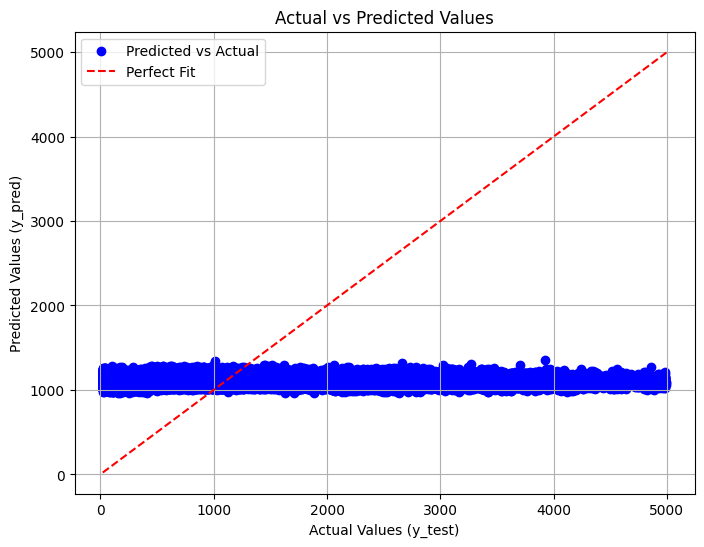

In [130]:
# Plot y_test vs y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')  # Scatter plot
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')  # Diagonal line

# Add labels and legend
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [131]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

666.2157603594857

In [132]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

744365.3101352121

In [133]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

np.float64(862.7660807746281)

In [134]:
from sklearn.metrics import root_mean_squared_log_error
rmsle = root_mean_squared_log_error(y_test, y_pred)
rmsle

1.1671673141487848

Using Linear Regression,
- RMSLE: 1.1671144134468894


In [ ]:
# import xgboost as xgb

In [ ]:
# xgb_model = xgb.XGBRegressor()

In [ ]:
# xgb_model.fit(X_train, y_train)

## ANN - Deep Learning

In [135]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [136]:
X_train.shape[1]

28

In [137]:
def rsmle_ann(y_test, y_pred):
    # Adding 1 to avoid log(0) and ensure positivity
    y_test = tf.math.maximum(y_test, 0)  # Ensure no negative values in y_test
    y_pred = tf.math.maximum(y_pred, 0)  # Ensure no negative values in y_pred
    log_test = tf.math.log1p(y_test)  # log1p(x) = log(x + 1)
    log_pred = tf.math.log1p(y_pred)
    return tf.sqrt(tf.reduce_mean(tf.square(log_test - log_pred)))

In [197]:
import time
#dataset define
model = Sequential(
    [Dense(units = 128, activation='relu', input_dim=X_train.shape[1]),
     Dense(units = 64, activation='relu'),
     Dense(units = 32, activation='relu'),
     Dense(units= 16, activation='relu'),
     Dense(units = 1, activation='linear')]
)

#compile using loss function
model.compile(optimizer='Adam', loss=rsmle_ann, metrics=[rsmle_ann])

#fitting the model
start = time.time()
model.fit(X_train, y_train, epochs=30, batch_size=16)
end = time.time()
time_taken = end - start
print(f'Time Taken is {time_taken}')

Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60000/60000 ━━━━━━━━━━━━━━━━━━━━ 20s 324us/step - loss: 1.1063 - rsmle_ann: 1.1063
Epoch 2/30
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 19s 324us/step - loss: 1.0812 - rsmle_ann: 1.0812
Epoch 3/30
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 19s 324us/step - loss: 1.0770 - rsmle_ann: 1.0770
Epoch 4/30
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 19s 321us/step - loss: 1.0729 - rsmle_ann: 1.0729
Epoch 5/30
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 19s 321us/step - loss: 1.0728 - rsmle_ann: 1.0728
Epoch 6/30
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 19s 324us/step - loss: 1.0714 - rsmle_ann: 1.0714
Epoch 7/30
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 19s 320us/step - loss: 1.0699 - rsmle_ann: 1.0699
Epoch 8/30
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 19s 321us/step - loss: 1.0646 - rsmle_ann: 1.0646
Epoch 9/30
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 19s 323us/step - loss: 1.0587 - rsmle_ann: 1.0587
Epoch 10/30
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 19s 322us/step - loss: 1.0602 - rsmle_ann: 1.0602
Epoch 11/30
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 19s 321us/step - loss: 1.

tuning:
- RMSprop is not performing better than adam
- 

Training Set:
- rsmle loss (25 epochs): 1.0785

In [188]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 128)            │         3,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,781 (171.02 KB)

 Trainable params: 14,593 (57.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,188 (114.02 KB)

In [189]:
#this helps in understanding if our model is performing good in CV set
loss, metrics = model.evaluate(X_test, y_test)

7500/7500 ━━━━━━━━━━━━━━━━━━━━ 2s 229us/step - loss: 1.0713 - rsmle_ann: 1.0713


When Running the the ANN through CV sets i.e. X_test, y_test
 - at 25 epochs, loss(mse): 735283.2125, mae = 662.2886
 - for Training sets, at 50 epochs, loss(mse): 747637.8750 - mae: 668.9519
 - rsmle_ann: CV_set: 1.0765


In [190]:
#TEST
test_pred = model.predict(X_TEST, batch_size=32)
test_pred

25000/25000 ━━━━━━━━━━━━━━━━━━━━ 4s 173us/step


array([[744.46265],
       [626.4483 ],
       [759.1845 ],
       ...,
       [702.6785 ],
       [722.3023 ],
       [775.6733 ]], dtype=float32)

In [191]:
submission = pd.concat([id_test, pd.DataFrame(test_pred, columns=['Premium Amount'])], axis=1)
submission


,id,Premium Amount
0,1200000,744.462646
1,1200001,626.448303
2,1200002,759.184509
3,1200003,705.267456
4,1200004,776.658020
...,...,...
799995,1999995,772.863953
799996,1999996,631.070190
799997,1999997,702.678528
799998,1999998,722.302307


In [192]:
submission.to_csv('submission_3.csv', index=False)

In [ ]:
# !kaggle competitions submit -c playground-series-s4e12 -f "submission.csv" -m "ANN"

In [149]:
from sklearn.ensemble import GradientBoostingRegressor


In [157]:
gbm = GradientBoostingRegressor(random_state=1, learning_rate=0.01, n_estimators=100)

In [158]:
gbm.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, random_state=1)

In [160]:
gbm_cvtest = gbm.predict(X_test)
gbm_cvtest

array([1053.21628063, 1117.71752684, 1117.91710035, ..., 1053.21628063,
       1123.36894839, 1053.21628063])

In [161]:
gbm.score(X_test, y_test)

0.008112108685677577

In [162]:
gbm_predict = gbm.predict(X_TEST)
gbm_predict

array([1226.16943691, 1115.9811104 , 1117.91710035, ..., 1053.21628063,
       1129.29576831, 1053.21628063])

In [163]:
submission_gbm = pd.concat([id_test, pd.DataFrame(gbm_predict, columns=['Premium Amount'])], axis=1)
submission_gbm

,id,Premium Amount
0,1200000,1226.169437
1,1200001,1115.981110
2,1200002,1117.917100
3,1200003,1053.216281
4,1200004,1053.216281
...,...,...
799995,1999995,1119.890820
799996,1999996,1151.944152
799997,1999997,1053.216281
799998,1999998,1129.295768


In [164]:
submission_gbm.to_csv("submission_gbm.csv", index=False)